<a href="https://colab.research.google.com/github/Alankaar63/Data-Analysis-With-Python/blob/main/dtreeviz_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)


In [7]:
!pip install dtreeviz

In [3]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

**Classification**

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df['target'] = data.target
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [5]:
X = df.drop('target',axis=1)
y = df['target']

In [6]:
from sklearn.model_selection import train_test_split
X_train1, X_test, y_train1, y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [19]:
!apt-get install -y fonts-freefont-ttf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-freefont-ttf is already the newest version (20120503-10build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
#kind of too long code to understand, did it for my own practice. Now time to make it simple to view the plot even better.

In [8]:
classifier = DecisionTreeClassifier(max_depth=2)
classifier.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=2)

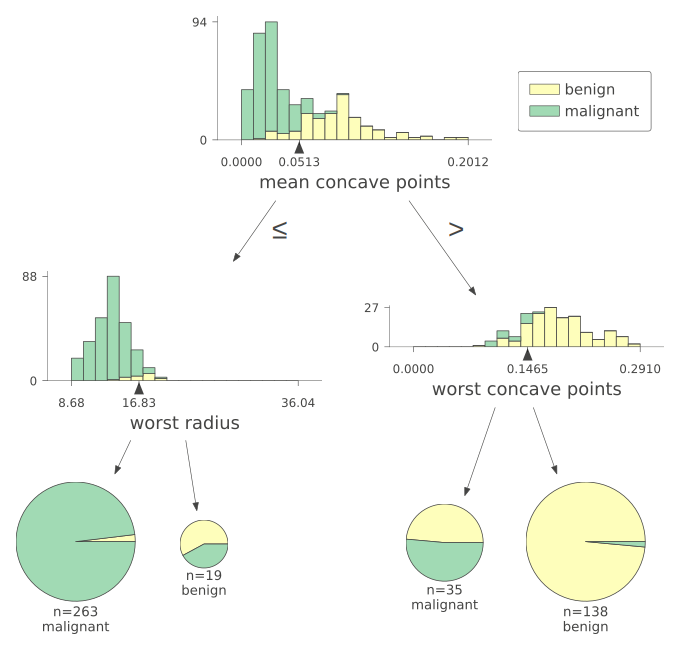

In [12]:
from dtreeviz import model

m = model(classifier,
          X_train1,
          y_train1.values,
          feature_names=X_train1.columns,
          class_names=["benign", "malignant"])

m.view(scale=2)



**Regression**

In [13]:
from sklearn.datasets import fetch_california_housing
cf_housing = fetch_california_housing()
df = pd.DataFrame(cf_housing.data)

In [14]:
df.columns = cf_housing.feature_names
df['Target'] = cf_housing.target

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

X = df.drop('Target',axis=1)
y = df['Target']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
rt = DecisionTreeRegressor(criterion='friedman_mse',max_depth=1)

rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=1)

In [19]:
plot = model(rt,X_train,y_train,feature_names = cf_housing.feature_names,target_name = "Target")
plot.view(scale=3)